# Week 2 handin

## Assignment

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015


## Status
All exercises in exercise 1 are done. The extra exercise 2 is not done.

## Solution part 1

In [2]:
import csv
import numpy as np

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

filename = '../data/befkbhalderstatkode.csv'
befData= np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)







    

Exercise 1.3 - How many lived in each area in 2015:  [51937, 75113, 78802, 61623, 51727, 39537, 43908, 53604, 55205, 64967, 3872] 

Exercise 1.4 - bar plot sorted:  


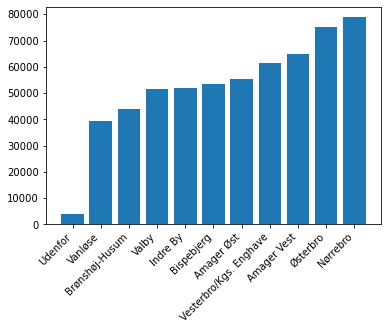

In [3]:
import matplotlib.pyplot as plt
mask2015 = befData[:,0] == 2015
datayear2015 = befData[mask2015]

sumPeople = []

for n in neighb.keys():
    
    maskBydel = datayear2015[:,1] == n
    bydelData = datayear2015[maskBydel]
    sumPeople += [np.sum(bydelData[:,-1])]

print("Exercise 1.3 - How many lived in each area in 2015: ", sumPeople, "\n")

## Exercise 1.4 - Make a bar plot to show the size of each city area from the smallest to the largest
sorted_cities = sorted(sumPeople)
sumPeople_ordered = [x for _, x in sorted(zip(sumPeople, neighb.values()))]

print("Exercise 1.4 - bar plot sorted:  ")
plt.bar(sumPeople_ordered, sorted_cities)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

mask_above65 = datayear2015[:,2] > 65
    




In [4]:
## Exercise 1.5 - Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
mask_above65 = datayear2015[:,2] > 65
data_above65 = datayear2015[mask_above65 & (datayear2015[:,1] != 99)]
print("Exercise 1.5 - Above 65 in 2015: ", data_above65[:,-1].sum())

## Exercise 1.6 - How many of those were from the other nordic countries (not dk)
##5105: 'Island, ligeret dansk', 5106: 'Island', 5120: 'Sverige',
##5110: 'Norge', 5104: 'Finland'

nordic_countriesID = {5105: 'Island, ligeret dansk', 5106: 'Island', 5120: 'Sverige',  5110: 'Norge', 5104: 'Finland'}

sum_nordic_countries = []
for n in nordic_countriesID.keys():
    mask_nordic_countries = data_above65[:,3] == n
    data_nordic_countries = data_above65[mask_nordic_countries]
    sum_nordic_countries += [data_nordic_countries[:,4].sum()]

print("Exercise 1.6 - Nordic countries without DK above 65 in 2015: ", int(sum(sum_nordic_countries)))





Exercise 1.5 - Above 65 in 2015:  55700
Exercise 1.6 - Nordic countries without DK above 65 in 2015:  608


In [7]:
## Exercise 1.7 - Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

vesterbro_amount_people = []
østerbro_amount_people = []
years = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 
         1999, 2000, 2001, 2002, 2003, 2004, 2005,
         2006, 2007, 2008, 2009, 2010, 2011, 2012,
         2013, 2014, 2015]

mask_vesterbro = befData[:,1] == 4
mask_østerbro = befData[:,1] == 2
data_vesterbro = befData[mask_vesterbro]
data_østerbro = befData[mask_østerbro]


for i in range(1992, 2016):
    mask_vesterbro_year = data_vesterbro[:,0] == i
    vesterbro_sum = data_vesterbro[mask_vesterbro_year]
    vesterbro_amount_people += [vesterbro_sum[:,-1].sum()]
    
    mask_østerbro_year = data_østerbro[:,0] == i
    østerbro_sum = data_østerbro[mask_østerbro_year]
    østerbro_amount_people += [østerbro_sum[:,-1].sum()]


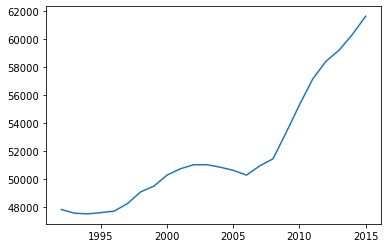

In [8]:
## Exercise 1.7 - Vesterbro
plt.plot(years, vesterbro_amount_people)

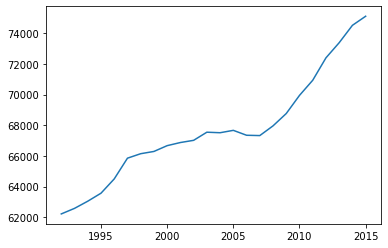

In [9]:
## Exercise 1.7 - Østerbro
plt.plot(years, østerbro_amount_people)